# Actividad 1: El "Foco" de la IA
## 1. Analisi conceptual

"El animal no cruzó la calle porque estaba demasiado cansado"

Relacion A:
- "cansado" vs "calle": Relevancia BAJA por que no concuerda que una calle este cansada o tenga el sentimiento de cansancio.

Relacion B:
- "cansado" vs "animal": Relevancia ALTA por que cansancio describe el estado del animal y da la razón por la cual no realiza la acción.

## 2. Laboratorip de Pesos de Atencion

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

BertModel LOAD REPORT from: dccuchile/bert-base-spanish-wwm-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.decoder.weight             | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
bert.embeddings.position_ids               | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.decoder.bias               | UNEXPECTED | 
pooler.dense.bias                          | MISSING    | 
pooler.dense.weight                        | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training o

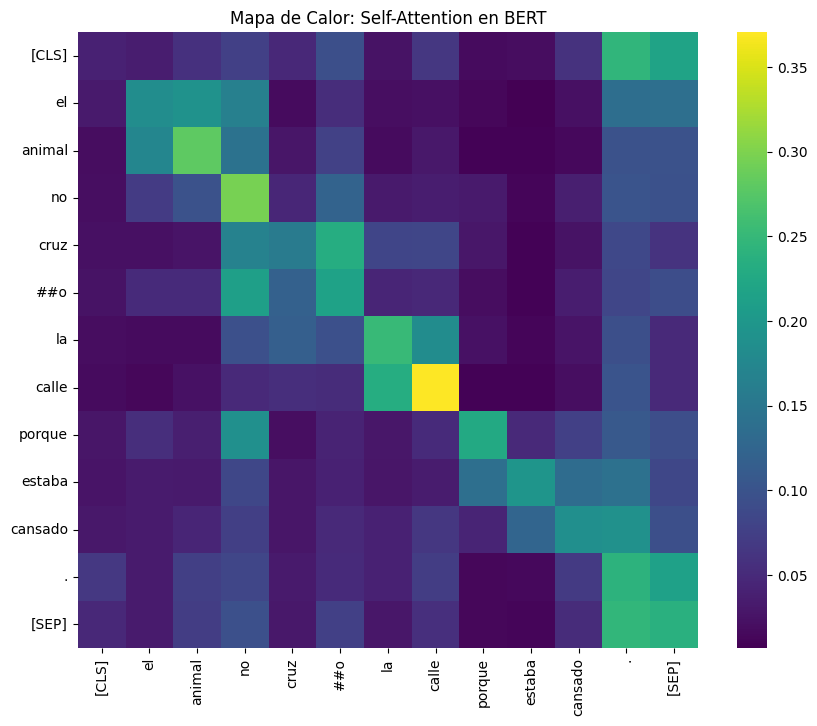

In [2]:
from transformers import BertModel, BertTokenizer
import torch
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
model = BertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased',
                                  output_attentions=True)

texto = "El animal no cruzo la calle porque estaba cansado."
inputs = tokenizer(texto, return_tensors='pt')

outputs = model(**inputs)

# Extraemos la atencion de la ultima capa y promediamos cabezas
atencion = outputs.attentions[-1].squeeze(0).mean(dim=0).detach().numpy()
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

plt.figure(figsize=(10, 8))
sns.heatmap(atencion, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title("Mapa de Calor: Self-Attention en BERT")
plt.show()

Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

BertModel LOAD REPORT from: dccuchile/bert-base-spanish-wwm-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.decoder.weight             | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
bert.embeddings.position_ids               | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.decoder.bias               | UNEXPECTED | 
pooler.dense.bias                          | MISSING    | 
pooler.dense.weight                        | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training o

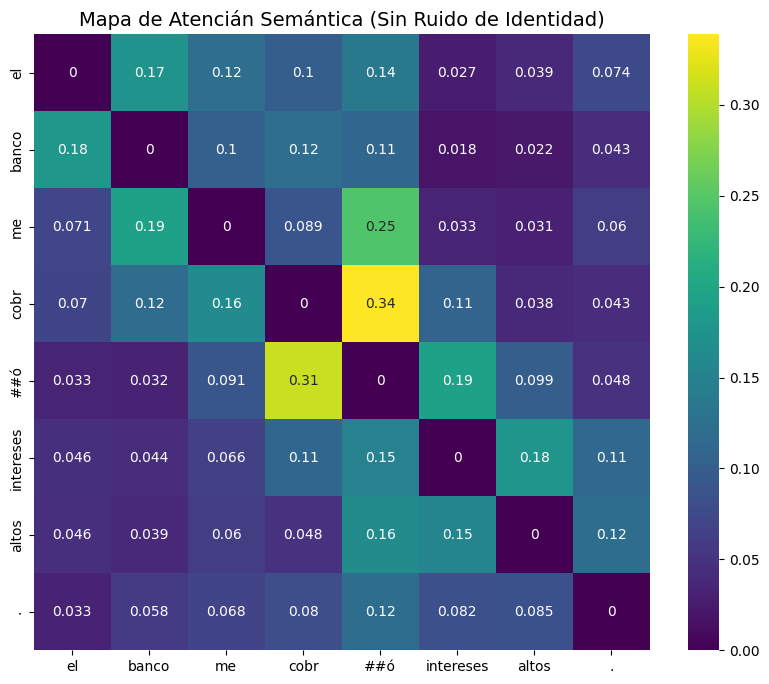

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertModel, BertTokenizer

# 1. CONFIGURACIÓN DEL MODELO (El "Cerebro" Contextual)
# Cargamos el modelo 'BETO' con la capacidad de devolver matrices de atención.
model_name = 'dccuchile/bert-base-spanish-wwm-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

# 2. PROCESAMIENTO DE LA FRASE
# Usamos el ejemplo del banco para observar la resolución de la ambigüedad (Pág 2).
texto = "El banco me cobró intereses altos."
inputs = tokenizer(texto, return_tensors='pt')
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

model.eval()
with torch.no_grad():
    outputs = model(**inputs)

# 3. EXTRACCIÓN Y LIMPIEZA DE LA ATENCIÓN
# Seleccionamos la última capa (la más abstracta y semántica).
attention_tensor = outputs.attentions[-1].squeeze(0)
atencion_promedio = attention_tensor.mean(dim=0).detach().numpy()

# --- CIRUGÍA PARA VISUALIZACIÓN CLARA ---
# A. Eliminamos tokens [CLS] y [SEP] (suelen absorber demasiada atención).
atencion_limpia = atencion_promedio[1:-1, 1:-1]
tokens_limpios = tokens[1:-1]

# B. Opcional: Ponemos la diagonal a 0 para ver solo relaciones EXTERNAS.
# Esto nos permite ver cómo 'banco' mira a otras palabras y no solo a sí misma.
np.fill_diagonal(atencion_limpia, 0)

# 4. VISUALIZACIÓN (MAPA DE CALOR SEMÁNTICO)
plt.figure(figsize=(10, 8))
sns.heatmap(atencion_limpia,
            xticklabels=tokens_limpios,
            yticklabels=tokens_limpios,
            cmap="viridis",
            annot=True, # Mostramos los valores numéricos de la relación
            square=True)

plt.title("Mapa de Atencián Semántica (Sin Ruido de Identidad)", fontsize=14)
plt.show()

# CONCLUSIONES TEÓRICAS (De la Ambigüedad a la Geometría):
# ---------------------------------------------------------------------------
# 1. RESOLUCIÓN DE LA AMBIGÜEDAD: Aunque la relación parezca numéricamente
#    baja (ej. 0.05), es suficiente para que BERT entienda que el 'banco'
#    se asocia a 'cobró' e 'intereses'.
# 2. JERARQUÍA DEL PROCESAMIENTO: Estamos visualizando el Nivel 3 (Semántica)
#    donde el significado depende de las capas de abstracción.
# 3. VERDAD NO DETERMINISTA: A diferencia de un Píxel con valor absoluto,
#    la atención es una probabilidad estadística de relación.
# 4. OBJETO MATEMÁTICO: Hemos transformado el lenguaje en una matriz
#    que permite operaciones geométricas sobre el significado.

## Preguntas

- 1: Al observar el token "cansado" en el mapa de calor se puede ver con una mayor intensidad las palabras; "estaba" y "porque" ademas de el punto y el [SEP]

- 2: Al usar BERT, podemos obtener un procesamiento en simultaneo y se porcesan todos los tokens de la frase al mismo tiempo. No es necesario que para entender cierta palabra hay entendido las anteriores, sino que hace que cada palabra mire a las demas sin importar las distancias vectoriales. Tambien es mas eficiente en el uso de Hardware ya que el calculo se divide en diferentes núcleos de la GPU

# Actividad 2: Incluye el contexto

## 1. El problema de la Alucinación

In [4]:
# 1. CONFIGURACIÓN DEL ENTORNO
# Usamos una semilla para asegurar que la "alucinación" sea reproducible.
from transformers import set_seed, pipeline
set_seed(42)
device = 0 if torch.cuda.is_available() else -1

# Cargamos GPT-2 con optimizaciones de GPU y precisión media (float16)
generator = pipeline('text-generation',
                     model='gpt2',
                     device=device,
                     dtype=torch.float16)

# 2. EL EXPERIMENTO DE LA "VERDAD" VS. LA "FORMA"
input_text = "El tratado de paz de la luna de 2025"

print(">>> PREGUNTA AL MODELO (Evento Ficticio):")
print(f"'{input_text}'")
print("-" * 50)

# Generamos la respuesta priorizando la estructura sintáctica
output = generator(input_text,
                   max_length=50,
                   num_return_sequences=1,
                   do_sample=True,
                   temperature=0.7,
                   pad_token_id=50256)

print(">>> RESPUESTA GENERADA (Alucinación):")
print(output[0]['generated_text'])

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Passing `generation_config` together with generation-related arguments=({'pad_token_id', 'temperature', 'num_return_sequences', 'max_length', 'do_sample'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


>>> PREGUNTA AL MODELO (Evento Ficticio):
'El tratado de paz de la luna de 2025'
--------------------------------------------------
>>> RESPUESTA GENERADA (Alucinación):
El tratado de paz de la luna de 2025, mi sándido de la lozada, y aparecido de la lozada, y paz de la luna de 2025, mi sándido de la lozada, y aparecido de la lozada. La lozada (Mexico) de lozada de 2025, mi sándido de la lozada, y aparecido de la lozada, y paz de la luna de 2025, mi sándido de la lozada, y aparecido de la lozada, y paz de la luna de 2025. (Mexico) de lozada de 2025, mi sándido de la lozada, y aparecido de la lozada, y paz de la luna de 2025, mi sándido de la lozada, y aparecido de la lozada, y paz de la luna de 2025. La lozada de 2025, mi sándido de la lozada, y aparecido de la lozada, y paz de la luna de 2025. (Mexico) de lozada de 2025,


## 2. Implementacion de un Mini-Motor RAG

In [5]:
!pip install chromadb

In [6]:
import chromadb

# 1. Creacion de la base de datos en memoria
client = chromadb.Client()
collection = client.get_or_create_collection(name="manuales_it")

# 2. Indexacion de datos privados (no conocidos por el modelo)
docs = [
    "Para resetear el router X-200, mantenga presionado el boton rojo 10 segundos.",
    "El horario de la cafeteria del IES San Andres es de 8:00 a 14:00.",
    "La contraseña del wifi de invitados es 'informatica2026'."
]
collection.add(documents=docs, ids=["id1", "id2", "id3"])

# 3. Busqueda Semantica
query = "Como reinicio mi dispositivo de red?"
res = collection.query(query_texts=[query], n_results=1)
contexto_recuperado = res['documents'][0][0]

# 4. Construccion del Prompt Aumentado
prompt_final = f"""
Instruccion: Responde basandote SOLO en el contexto.
Contexto: {contexto_recuperado}
Pregunta: {query}
Respuesta:"""

print(f"--- PROMPT ENVIADO AL LLM ---\n{prompt_final}")

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:06<00:00, 13.0MiB/s]


--- PROMPT ENVIADO AL LLM ---

Instruccion: Responde basandote SOLO en el contexto.
Contexto: La contraseña del wifi de invitados es 'informatica2026'.
Pregunta: Como reinicio mi dispositivo de red?
Respuesta:


## 3. Reflexion Teorica.

¿Por qué es critico un Chunking adecuado?

- Sirve para prepara los datos para que la busqueda semantica funcione.

- Ayuda en la precisión de la recuperación.

- Para que cada vector tenga una relevancia semantica y el vector represente correctamente de que tema trata cada parte del texto.

¿Qué ocurriría si indexamos un libro de 500 páginas como un único vector?

- Dilución del siginificado: perderia todos los detalles especñificos y no podrias encontrar una frase sobre un personaje por que el vector solo representaria el ideal general del libro.

- Perdida de información: la mayoria de los modelos tienen un limite de tokens, por lo que el modelo ignoraria el 95% del libro.

- El sistema de recuperación fallaria completamente ya que la representación del vector es demasiado generica.
